In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

In [2]:
# EXERCICE 1

X, y, w = make_regression(
     n_samples=100,  # row length
     n_features=1,    # column length
     bias=100,        # intercept
     noise=500,       # noise value
     coef=True,       # coefficient
     random_state=42) # random seed

X.shape,y.shape,w

((100, 1), (100,), array(41.74110031))

In [3]:
X[:5]

array([[ 0.93128012],
       [ 0.08704707],
       [-1.05771093],
       [ 0.31424733],
       [-0.47917424]])

In [4]:
y[1:5]

array([-581.30208795,  517.43128618,  -16.39729294,  193.14287482])

In [5]:
X_data = np.array(X)
y_data = np.array(y)

In [6]:
new_data = np.append(X_data,y_data.reshape(-1,1),axis=1)
new_data.shape

(100, 2)

In [7]:
df = pd.DataFrame(new_data)
df.head()

,0,1
0,0.931280,734.236285
1,0.087047,-581.302088
2,-1.057711,517.431286
3,0.314247,-16.397293
4,-0.479174,193.142875


In [8]:
new_col=[]
i=0
for col in df.columns:
  if i == len(df.columns) - 1:
    new_col.append('target')
  else:
    new_col.append('col'+str(i))

  i+=1

df.columns = new_col
df.columns

Index(['col0', 'target'], dtype='object')

In [9]:
df.head()

,col0,target
0,0.931280,734.236285
1,0.087047,-581.302088
2,-1.057711,517.431286
3,0.314247,-16.397293
4,-0.479174,193.142875


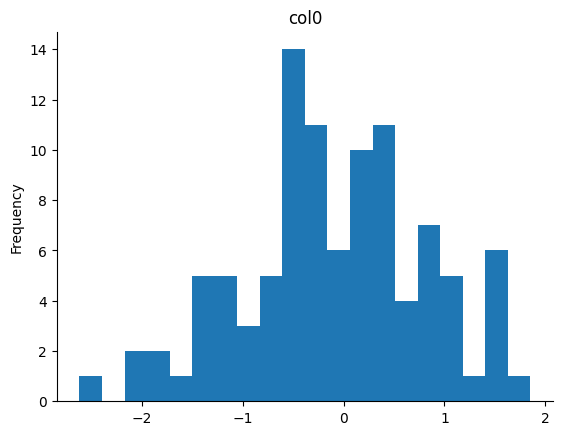

In [10]:
# @title col0

from matplotlib import pyplot as plt
df['col0'].plot(kind='hist', bins=20, title='col0')
plt.gca().spines[['top', 'right',]].set_visible(False)

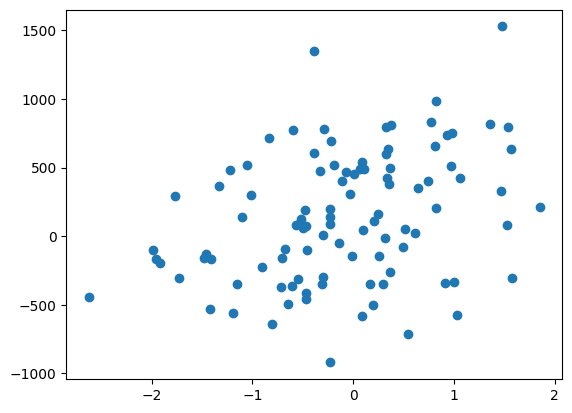

In [11]:
plt.scatter(X, y)
plt.show()

In [12]:
from scipy import stats

In [13]:
# Reshape X to make it 1D
X = np.squeeze(X)

# Now, perform linear regression
slope, intercept, r, p, std_err = stats.linregress(X, y)

In [14]:
def myfunc(X):
  return slope * X + intercept

mymodel = list(map(myfunc, X))



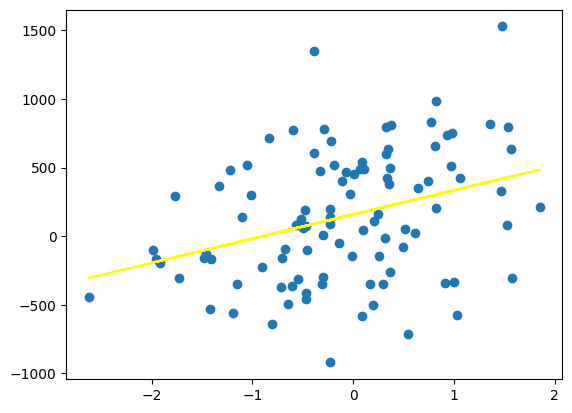

In [15]:
plt.scatter(X, y)
plt.plot(X, mymodel, color='yellow')
plt.show()

In [16]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    error = predictions - y
    cost = (1/(2*m)) * np.sum(error**2)
    return cost

def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    costs = []

    for _ in range(num_iterations):
        predictions = np.dot(X, theta)
        error = predictions - y
        gradient = (1/m) * np.dot(X.T, error)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)

    return theta, costs

# Exemple d'utilisation
# Génération de données aléatoires pour les caractéristiques (X) et la cible (y)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Ajout d'une colonne de biais à X
X_b = np.c_[np.ones((100, 1)), X]

# Initialisation aléatoire des paramètres theta
theta = np.random.randn(2, 1)

# Paramètres d'apprentissage
alpha = 0.01
num_iterations = 1000

# Exécution de la descente de gradient
theta_final, costs = gradient_descent(X_b, y, theta, alpha, num_iterations)

print("Paramètres finaux:", theta_final)

Paramètres finaux: [[4.23652106]
 [2.71868054]]


In [17]:
import numpy as np

def linear_regression(X, Y, theta, learning_rate, num_iterations):
    m = len(Y)
    for i in range(num_iterations):
        # Calculer la prédiction
        F = np.dot(X, theta)

        # Calculer l'erreur
        error = F - Y

        # Calculer le gradient
        gradient = (1/m) * np.dot(X.T, error)

        # Mettre à jour les paramètres theta avec la descente de gradient
        theta = theta - learning_rate * gradient

        # Calculer la fonction de coût J(theta)
        cost = (1/(2*m)) * np.sum(np.square(F - Y))

        # Afficher le coût à chaque itération (optionnel)
        print(f"Iteration {i+1}, Cost: {cost}, Theta: {theta.flatten()}")

    return theta

# Exemple d'utilisation
# Données d'entraînement
X = np.array([[1, 1], [1, 2], [1, 3], [1, 4]])  # Matrice X avec la première colonne étant 1 pour le biais
Y = np.array([2, 3, 4, 5])  # Valeurs cibles
# Initialisation des paramètres theta
theta = np.zeros((2, 1))  # Initialisation à zéro pour les paramètres theta
# Paramètres d'apprentissage
learning_rate = 0.01
num_iterations = 1000
# Entraînement du modèle
theta_final = linear_regression(X, Y.reshape(-1, 1), theta, learning_rate, num_iterations)
print("Paramètres finaux:", theta_final)


Iteration 1, Cost: 6.75, Theta: [0.035 0.1  ]
Iteration 2, Cost: 5.674362499999999, Theta: [0.06715  0.191625]
Iteration 3, Cost: 4.770849135468749, Theta: [0.09668788 0.27557437]
Iteration 4, Cost: 4.011914347481419, Theta: [0.12383164 0.3524891 ]
Iteration 5, Cost: 3.3744207847375973, Theta: [0.14878109 0.42295663]
Iteration 6, Cost: 2.8389338433800697, Theta: [0.17171937 0.48751535]
Iteration 7, Cost: 2.389129103961335, Theta: [0.19281429 0.54665872]
Iteration 8, Cost: 2.01129459825048, Theta: [0.21221968 0.60083896]
Iteration 9, Cost: 1.693912729944473, Theta: [0.23007651 0.65047054]
Iteration 10, Cost: 1.4273091020036632, Theta: [0.24651398 0.69593334]
Iteration 11, Cost: 1.2033575433210562, Theta: [0.26165051 0.73757549]
Iteration 12, Cost: 1.0152323409583923, Theta: [0.27559461 0.77571606]
Iteration 13, Cost: 0.8572001234845749, Theta: [0.28844577 0.81064749]
Iteration 14, Cost: 0.7244450499181875, Theta: [0.30029512 0.84263779]
Iteration 15, Cost: 0.6129219742670903, Theta: [0.

#  **Exercice 2 - Partie 1 **

In [21]:
from sklearn import datasets

In [22]:
iris = datasets.load_iris()

In [23]:
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
print("Features of the dataset Iris:")
print(iris.feature_names)

Features of the dataset Iris:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [25]:
irisdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
irisdf.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


In [27]:
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [28]:
irisdf.shape

(150, 4)

In [29]:
irisdf.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [30]:
X = iris.data
Y = iris.target

In [31]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [33]:
from sklearn.svm import SVC

# Entraînement du modèle avec SVM linéaire
model = SVC(kernel='linear', C=0.05, gamma='auto')
model.fit(X_train, Y_train)


SVC(C=0.05, gamma='auto', kernel='linear')

In [34]:
Y_pred = model.predict(X_test)


In [35]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matrice de confusion:")
print(conf_matrix)


Matrice de confusion:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['auto','scale'] }
grid = GridSearchCV(SVC(kernel='linear'), param_grid, refit=True, verbose=2)
grid.fit(X_train, Y_train)

print("Meilleurs paramètres trouvés par gridsearchCV:", grid.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END ....................................C=1, gamma=auto; total time=   0.0s
[CV] END ....................................C=1,

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

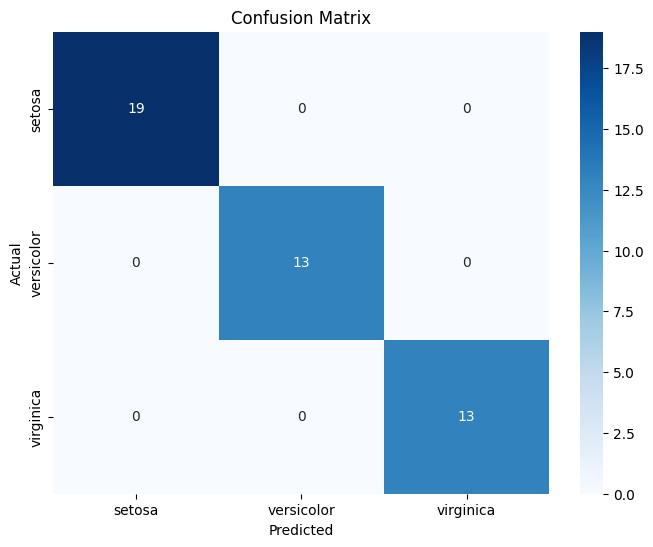

In [38]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
model1 = SVC(kernel='linear', C=1 , gamma='auto')
model1.fit(X_train , Y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [40]:
Y_pred = model1.predict(X_test)


In [41]:
conf_matrix1 = confusion_matrix(Y_test,Y_pred)
print(conf_matrix1)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [42]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.0


Matrice de confusion:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


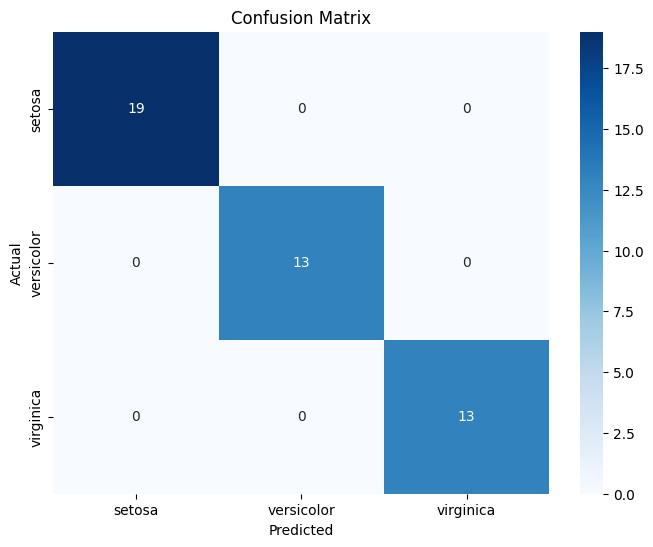

In [43]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Matrice de confusion:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
Classifier1 =SVC( kernel='rbf' , C=0.006 , gamma='scale')
Classifier2 =SVC( kernel='poly', C=1 , gamma='auto', degree=7)

In [45]:
Classifier1.fit(X_train,Y_train)

SVC(C=0.006)

In [46]:
Y_pred = Classifier1.predict(X_test)

In [47]:
conf_matrix1 = confusion_matrix(Y_test,Y_pred)
print(conf_matrix1)

[[ 0 19  0]
 [ 0 12  1]
 [ 0  0 13]]


In [48]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5555555555555556


In [49]:
from sklearn.metrics import classification_report

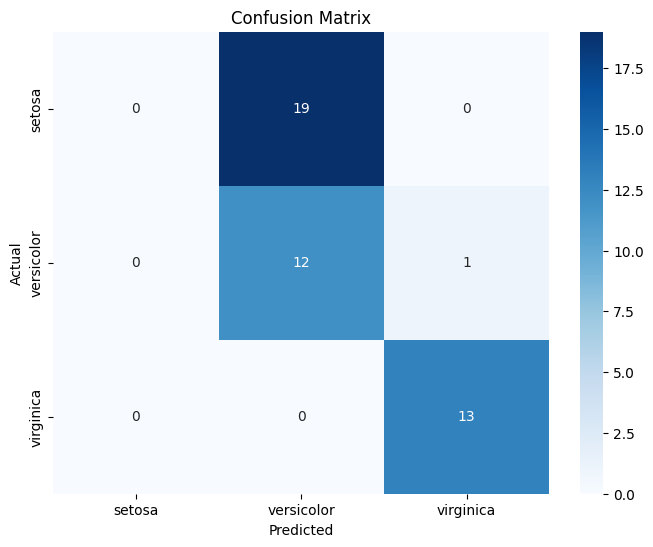

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.39      0.92      0.55        13
           2       0.93      1.00      0.96        13

    accuracy                           0.56        45
   macro avg       0.44      0.64      0.50        45
weighted avg       0.38      0.56      0.44        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
#confusion matrix for the kernel  RBF
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(Y_test, Y_pred))

In [51]:
Classifier2.fit(X_train,Y_train)
Y_pred = Classifier2.predict(X_test)

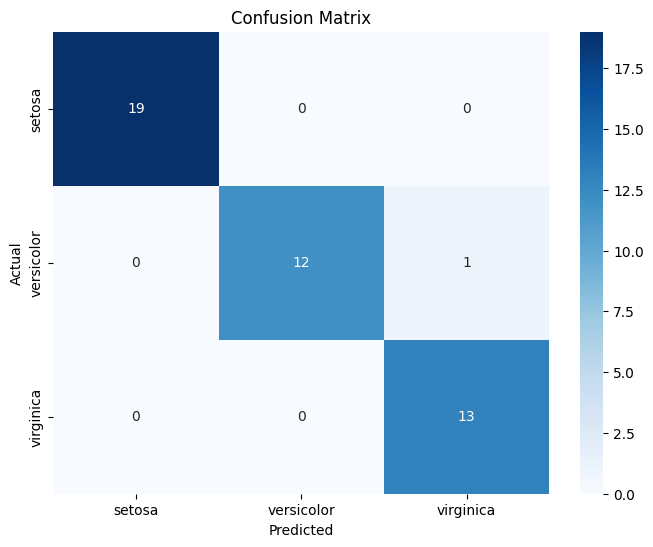

Accuracy of the model 2  ; 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [52]:
#confusion matrix for the kernel poly
confm2 = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confm2, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy2 = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model 2  ;", accuracy2)
print(classification_report(Y_test, Y_pred))

# **Part 3 : Breast Cancer  Data analogy **

In [53]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = load_breast_cancer()
X = data.data
Y = data.target

Exploratory Data Analysis

In [56]:
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [57]:
breast_cancer_df = pd.DataFrame(data.data, columns=data.feature_names)
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [59]:
breast_cancer_df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [60]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [61]:
breast_cancer_df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
mean texture,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
mean perimeter,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
mean area,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
mean smoothness,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
mean compactness,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
mean concavity,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
mean concave points,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
mean symmetry,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
mean fractal dimension,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


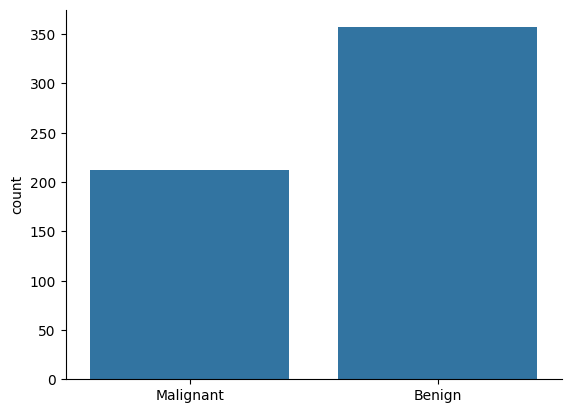

In [62]:
sns.countplot(x=data.target)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.show()

Data Preprocessing

In [63]:
corr = breast_cancer_df.corr()

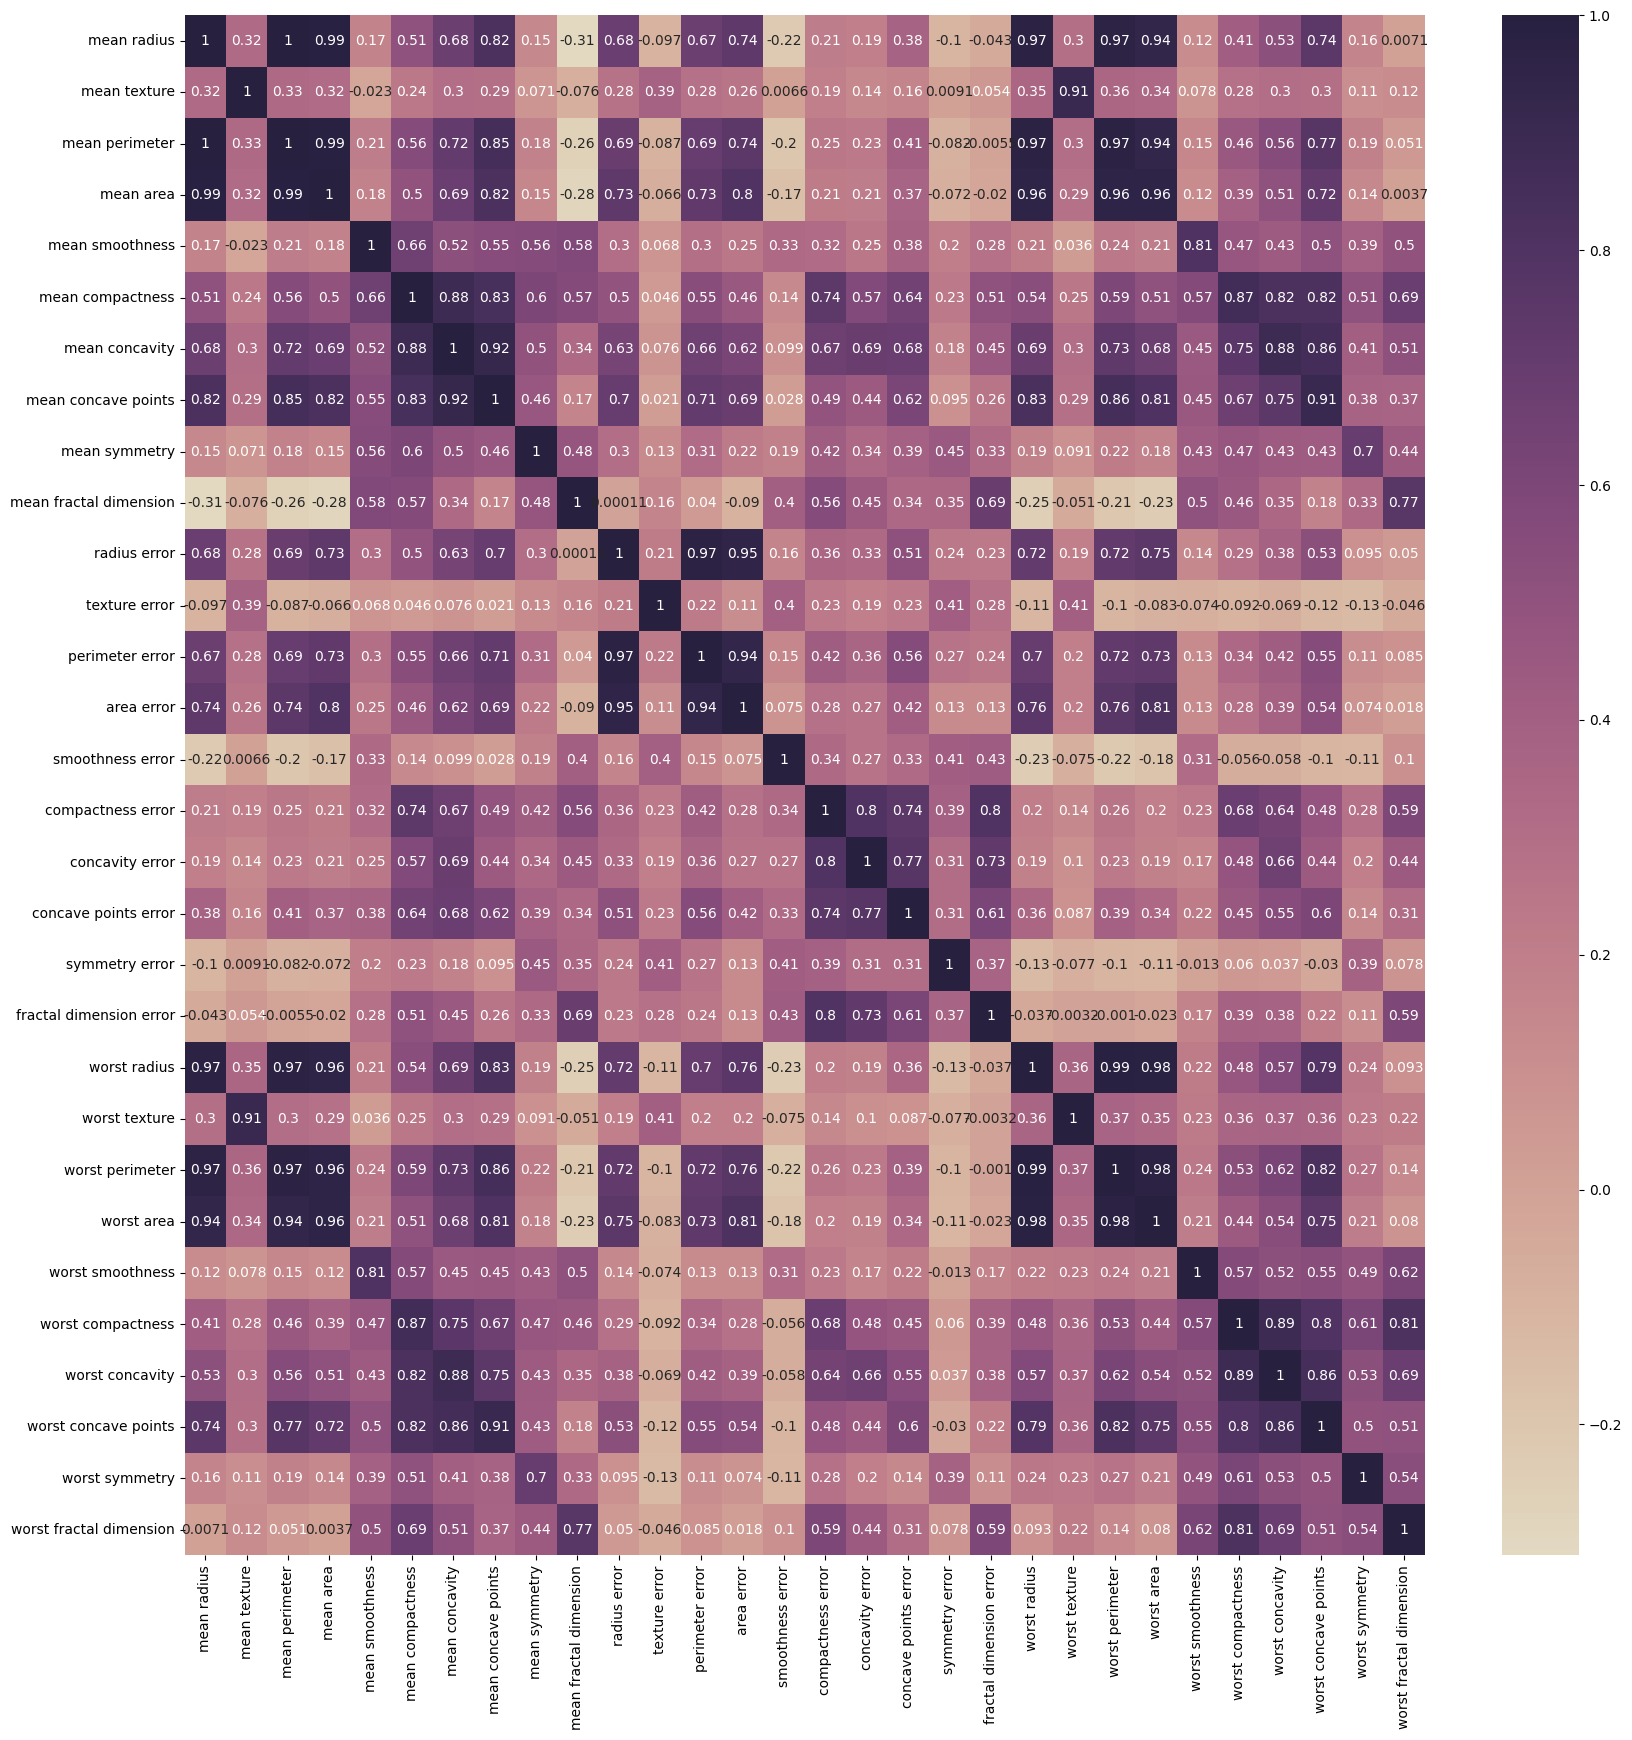

In [64]:
# choosing features that have a high correlation
# with the target variable can lead to improved model performance.
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

In [65]:
breast_cancer_df['target'] = data.target
# Calculate the correlation matrix *after* adding the target column
corr = breast_cancer_df.corr()

#the absolute value of the correlation with the target
cor_target = abs(corr["target"])
#  features that have high correlation with the target by threshold > 0.2
relevant_features = cor_target[cor_target > 0.2]
print(relevant_features)

mean radius                0.730029
mean texture               0.415185
mean perimeter             0.742636
mean area                  0.708984
mean smoothness            0.358560
mean compactness           0.596534
mean concavity             0.696360
mean concave points        0.776614
mean symmetry              0.330499
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
compactness error          0.292999
concavity error            0.253730
concave points error       0.408042
worst radius               0.776454
worst texture              0.456903
worst perimeter            0.782914
worst area                 0.733825
worst smoothness           0.421465
worst compactness          0.590998
worst concavity            0.659610
worst concave points       0.793566
worst symmetry             0.416294
worst fractal dimension    0.323872
target                     1.000000
Name: target, dtype: float64


In [66]:
names = [index for index, value in relevant_features.items()]

In [67]:
names.remove('target')

In [68]:
print(names)

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'radius error', 'perimeter error', 'area error', 'compactness error', 'concavity error', 'concave points error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [69]:
X = breast_cancer_df[names]
y = breast_cancer_df['target']

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state=42)
#split the  data into traing and validating


In [73]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test):


    model.fit(X_train, y_train)


    predictions = model.predict(X_test)

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    confm2 = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confm2, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

In [74]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (455, 5)
Shape of y_train: (455,)


In [75]:
import sklearn.svm as svm
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

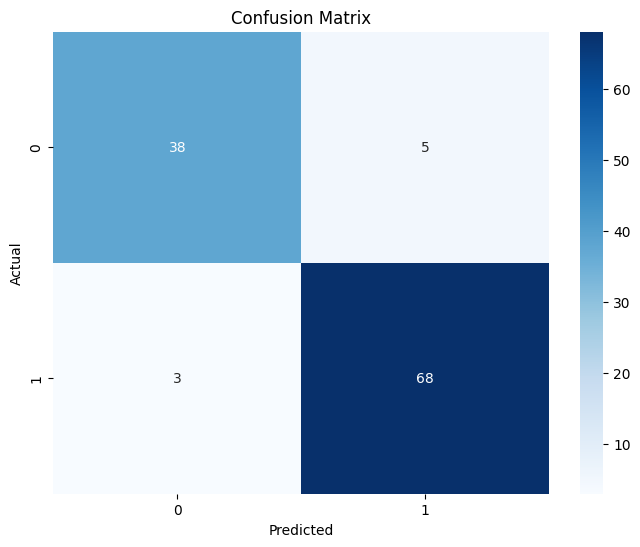

In [76]:
clf_svmpoly_bc = svm.SVC(kernel='poly', C=1, gamma='auto', degree=7)
results = train_evaluate_model(clf_svmpoly_bc, X_train, y_train, X_test, y_test)

In [77]:
results.index = ['svm_kernel_poly']

In [78]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
svm_kernel_poly,0.929825,0.944444,0.931507,0.957746,0.920734


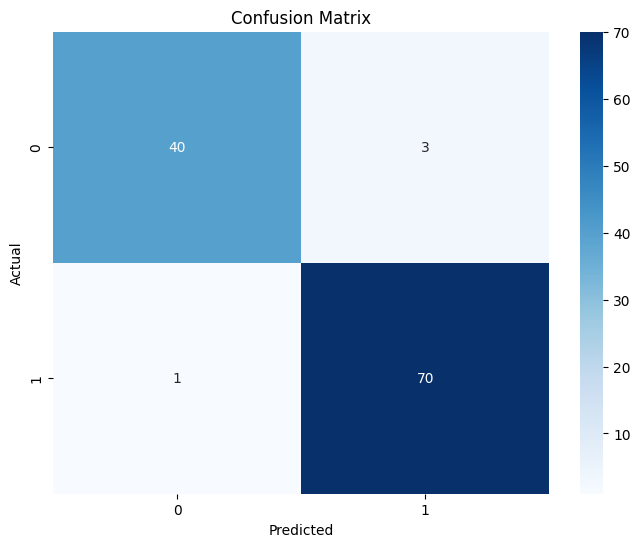

In [79]:
clf_linear_bc = svm.SVC(kernel='linear', C=1, gamma='auto')
clf_linear_results = train_evaluate_model(clf_linear_bc , X_train, y_train, X_test, y_test)

clf_linear_results.index = ['svm_kernel_linear']

results = pd.concat([results, clf_linear_results])

In [80]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
svm_kernel_linear,0.964912,0.972222,0.958904,0.985915,0.958074
svm_kernel_poly,0.929825,0.944444,0.931507,0.957746,0.920734


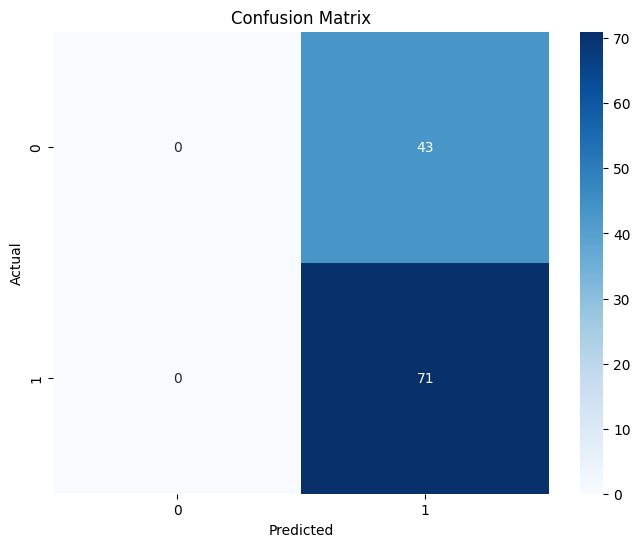

,accuracy,f1_score,precision,recall,balanced_accuracy
svm_kernel_linear,0.964912,0.972222,0.958904,0.985915,0.958074
svm_kernel_poly,0.929825,0.944444,0.931507,0.957746,0.920734
svm_kernel_rbf,0.622807,0.767568,0.622807,1.000000,0.500000


In [81]:
clf_rbf_bc = svm.SVC(kernel='rbf', C=1, gamma='auto')
clf_rbf_results = train_evaluate_model(clf_rbf_bc , X_train, y_train, X_test, y_test)

clf_rbf_results.index = ['svm_kernel_rbf']

results = pd.concat([results, clf_rbf_results])
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))